In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_df = pd.read_csv('../data/house_data.csv')
data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
FEAT_COLS = data_df.columns.tolist()[3:]
FEAT_COLS

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [7]:
X = data_df[FEAT_COLS].values
y = data_df['price'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10)

In [10]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
acc = lr_model.score(X_test, y_test)
print(acc)

0.7060727945004369


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


**所有特征都用，貌似预测结果并不是很高，查看一下相关性corr，只选择几组相关性高的特征进行预测**

In [5]:
corr = data_df[FEAT_COLS].corr()
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050


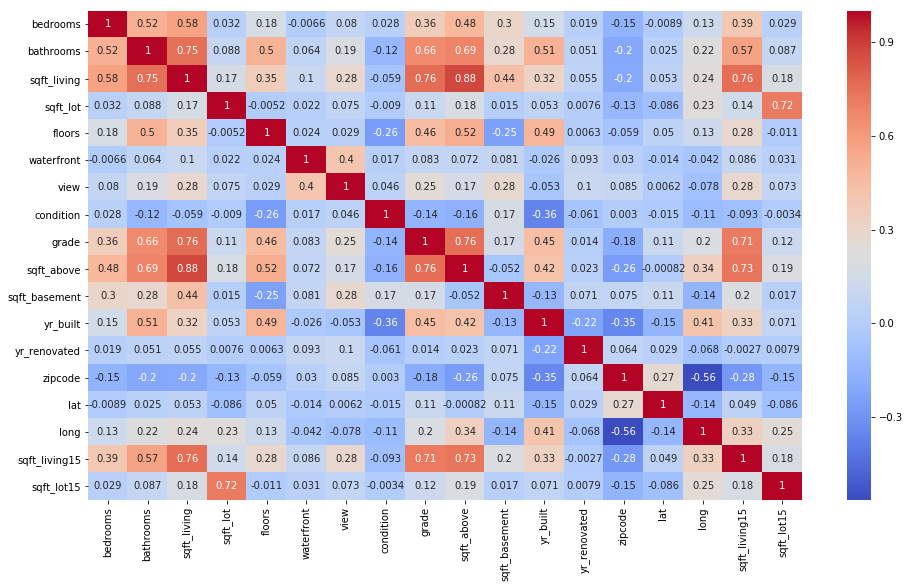

In [6]:
plt.figure(figsize=(16,9))
sns.heatmap(data=corr, annot=True, cmap='coolwarm')

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f79b978>,
      dtype=object)

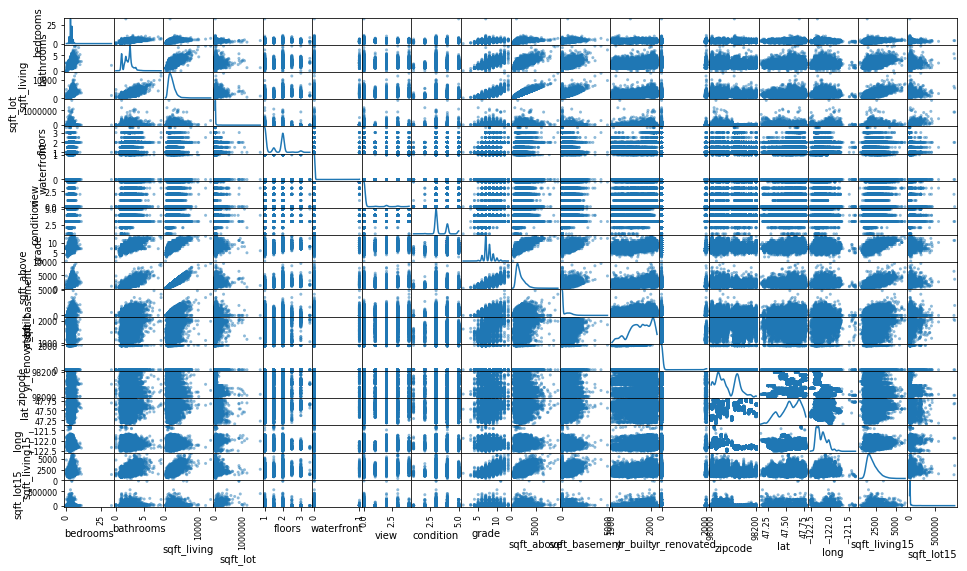

In [25]:
pd.scatter_matrix(data_df[FEAT_COLS],
                 diagonal='kde', # default=hist,
                 figsize=(16,9),
                 range_padding=0.1)

In [26]:
KEY_FEAT_COLS = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

In [27]:
X1 = data_df[KEY_FEAT_COLS].values
y1 = data_df['price']

In [28]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=1/3, random_state=10)

In [30]:
lr_model1 = LinearRegression()
lr_model1.fit(X1_train, y1_train)
acc1 = lr_model1.score(X1_test, y1_test)
print(acc1)

0.5058817864948704


```python
"""
    任务：房屋价格预测
"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import ai_utils

DATA_FILE = './data_ai/house_data.csv'

# 使用的特征列
FEAT_COLS = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']


def main():
    """
        主函数
    """
    house_data = pd.read_csv(DATA_FILE, usecols=FEAT_COLS + ['price'])
    ai_utils.plot_feat_and_price(house_data)

    X = house_data[FEAT_COLS].values
    y = house_data['price'].values

    # 分割数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10)

    # 建立线性回归模型
    linear_reg_model = LinearRegression()
    # 模型训练
    linear_reg_model.fit(X_train, y_train)
    # 验证模型
    r2_score = linear_reg_model.score(X_test, y_test)
    print('模型的R2值', r2_score)

    # 单个样本房价预测
    i = 50
    single_test_feat = X_test[i, :]
    y_true = y_test[i]
    y_pred = linear_reg_model.predict([single_test_feat])
    print('样本特征:', single_test_feat)
    print('真实价格：{}，预测价格：{}'.format(y_true, y_pred))


if __name__ == '__main__':
    main()
```